In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

##########데이터 분석

##########데이터 전처리

x_train_df = train_df.drop(['가격'], axis=1)
x_test_df = test_df.drop(['가격'], axis=1)
y_train_df = train_df['가격']
y_test_df = test_df['가격']

display(x_train_df.head())

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [5]:
x_train = pd.get_dummies(x_train_df)  #문자로 되어있던 자료들이 숫자로 분류된다.
# 변수 갯수가 너무 많으면 변속기 같이 두개로 나뉘는건 안해줘도된다.
# 하지만 자동 = 0 수동 = 1 이렇게 라벨링을 해줘야 한다.

x_test = pd.get_dummies(x_test_df)

In [6]:
x_train.describe() # 자료 편차가 큰 자료에 힘이 실릴수도 있으니 스케일링 작업 진행

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2014.436620,12.361972,175.647887,29.443662,0.042254,2152.450704,1580.563380,0.366197,0.225352,0.211268,0.197183,0.070423,0.507042,0.422535,0.281690,0.718310
std,1.167811,3.154333,61.207165,12.143943,0.202599,687.918699,367.027859,0.485193,0.420788,0.411113,0.400704,0.257679,0.503509,0.497479,0.453025,0.453025
min,2011.000000,6.300000,100.000000,13.600000,0.000000,1368.000000,1035.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,9.950000,136.000000,18.150000,0.000000,1591.000000,1261.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,12.400000,166.000000,27.000000,0.000000,1999.000000,1615.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2015.000000,14.200000,200.000000,41.000000,0.000000,2428.000000,1903.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2015.000000,19.000000,416.000000,52.000000,1.000000,5038.000000,2210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#스케일링 작업


# MinMax는 더미 변수의 값의 0과 1에 변형이 없어서
# 별도 변수 분리 없이 모두에 적용
# 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_x_train = scaler.fit_transform(x_train) 
# fit_transform = 피팅과 트랜스폼을 동시에 진행
scaler_x_test = scaler.transform(x_test)
# transform 만 진행

In [8]:
scaler_x_train #스케일러 시키면 넘파이로 변경됨

array([[1.        , 0.43307087, 0.2278481 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.47244094, 0.32911392, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.68503937, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.51181102, 0.2721519 , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.8976378 , 0.17721519, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.59055118, 0.32278481, ..., 1.        , 0.        ,
        1.        ]])

In [10]:
#리니어 리그레이션 선형회귀 분석

#선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scaler_x_train, y_train_df) # 이작업에서는 데이터의 회귀 계수와

model.coef_, model.intercept_

(array([ 140.42708513, 1666.18511725, 3109.14675071, -301.08509852,
         325.68069979, 6567.11718155,  150.92399575, -538.07573372,
         463.8614926 ,   10.9448916 ,   63.26934952,  288.56121264,
        -212.79830412,  -75.76290851, -161.29147786,  161.29147786]),
 -408.18794176720985)

In [11]:
model.score(scaler_x_test, y_test_df) # 모델의 스코어 값을 불러온다.

# 77%정도의 설명력을 갖는다.
# x변수가 얼마나 y 변수에 적합한가?

0.7739730315244936

In [24]:
# 변수 중요도는  coef_로 확인함
# key 값을 

coeffDf= pd.DataFrame({'columns': x_train.columns,
                          'coeff':model.coef_})

coeffDf.sort_values('coeff', ascending=False)
# 하지만 데이터가 잘 정리 되어있다는 전제 조건 하에서 보는것
# 만약 이게 맞다면 잔차 분석까지 이루어 져야 한다.

,columns,coeff
5,배기량,6567.117182
2,마력,3109.146751
1,연비,1666.185117
8,종류_소형,463.861493
4,하이브리드,325.680700
11,연료_LPG,288.561213
15,변속기_자동,161.291478
6,중량,150.923996
0,년식,140.427085
10,종류_중형,63.269350


In [32]:
 scaler_x_train.shape

(71, 16)

In [38]:
# 전통적인 통계 방법론 보단 새로 나온 방법을 사용한다.
# 전통적인 방법은 ols 기법
# OLS(최소제곱법 : )
import statsmodels.api as sm
from statsmodels.formula.api import ols


################외워야 하는것, 고전적인 통계방법론에서, 변수 설명력을 얘기 하기위해
# 데이터셋이 작은 데이터는 상수를 추가 해줘야 한다.
# 앞쪽에 1을 추가 해주면서 weight가 추가되고 이 1이 b라고 생각한다.
# 전문적인 용어로 상수항 추가라고 한다.

x2 = sm.add_constant(scaler_x_train)# 상수항 추가
#x2[:,0] # 상수항 추가된 것을 확인하는것

model_OLS = sm.OLS(y_train_df, x2)
result = model_OLS.fit() # 모델에 fit 해주기
result.summary() #model.coef_ 와 똑같이 나온다

# 처음부터 선형회귀 돌리지 말고 model.coef_ 를 돌려도 된다.
#model_OLS.score(scaler_x_test, y_test_df)

# R-squared:	0.885 으로 나쁘지 않지만 조금 부족하다.
# 다른 값을 제거 해야되는지 다중공산성을 확인해봐야 된다.
# P>|t| 값을 보고 0,05 미만인 경우가 제일 좋다.
# 값이 튀면 잡아줘야 한다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     가격   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           6.27e-22
Time:                        17:09:40   Log-Likelihood:                -540.77
No. Observations:                  71   AIC:                             1110.
Df Residuals:                      57   BIC:                             1141.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -195.9302    341.907     -0.573      0.569    -880.587     488.727
x1           140.4271    336.952      0.417      0.678    -534.308     815.162
x2          1666.1851    759.186      2.195      0.032     145.942    3186.428
x3          3109.1468   1353.780      2.297      0.025     398.250    5820.044
x4          -301.0851    604.272     -0.498      0.620   -1511.120     908.950
x5           325.6807    502.303      0.648      0.519    -680.164    1331.525
x6          6567.1172   1517.244      4.328      0.000    3528.888    9605.346
x7           150.9240   1059.427      0.142      0.887   -1970.543    2272.391
x8          -587.0583    283.102     -2.074      0.043   -1153.960     -20.157
x9           414.8789    253.318      1.638      0.107     -92.382     922.140
x10          -38.0377    162.546     -0.234      0.816    -363.531     287.455
x11           14.2868    240.580      0.059      0.953    -467.466     496.039
x12          223.2511    222.444      1.004      0.320    -222.184     668.687
x13         -278.1084    190.909     -1.457      0.151    -660.397     104.180
x14         -141.0730    306.451     -0.460      0.647    -754.730     472.584
x15         -259.2566    210.255     -1.233      0.223    -680.284     161.771
x16           63.3264    169.563      0.373      0.710    -276.218     402.870
==============================================================================
Omnibus:                       25.864   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.139
Skew:                           0.896   Prob(JB):                     6.62e-23
Kurtosis:                       8.596   Cond. No.                     2.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.64e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
model.coef_

array([ 140.42708513, 1666.18511725, 3109.14675071, -301.08509852,
        325.68069979, 6567.11718155,  150.92399575, -538.07573372,
        463.8614926 ,   10.9448916 ,   63.26934952,  288.56121264,
       -212.79830412,  -75.76290851, -161.29147786,  161.29147786])

In [40]:
x_train

# x1 은 년식, x2는 연비, ~~~
# 불필요한 데이터셋은 지우고 다시 돌려보기

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,0,0,1,0,0,1,0,0,1
1,2015,12.3,204,27.0,0,1591,1300,0,0,1,0,0,1,0,0,1
2,2015,15.0,100,13.6,0,1368,1035,0,1,0,0,0,1,0,1,0
3,2014,14.0,140,17.0,0,1591,1090,0,1,0,0,0,1,0,0,1
4,2015,9.6,175,46.0,0,2497,1990,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2015,8.5,290,34.8,0,3342,1901,0,0,0,1,0,1,0,0,1
67,2012,13.3,108,13.9,0,1396,1040,0,1,0,0,0,1,0,0,1
68,2015,12.8,186,41.0,0,1995,1665,0,0,1,0,0,0,1,0,1
69,2015,17.7,156,19.3,1,1999,1585,0,0,0,1,0,1,0,0,1


In [41]:
result.params # 선형회귀의 coef_와 같음

const    -195.930212
x1        140.427085
x2       1666.185117
x3       3109.146751
x4       -301.085099
x5        325.680700
x6       6567.117182
x7        150.923996
x8       -587.058287
x9        414.878940
x10       -38.037661
x11        14.286797
x12       223.251142
x13      -278.108375
x14      -141.072979
x15      -259.256584
x16        63.326372
dtype: float64

In [ ]:
# 다중 공선성 문제 확인
# 상관계수/산점도를 통해 다중공선성 확인

In [42]:
x_train.corr()

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
년식,1.000000,-0.354930,0.485245,0.538361,-0.079089,0.451284,0.569321,0.268459,-0.697305,0.162189,0.240789,-0.103639,-0.308995,0.366423,-0.181793,0.181793
연비,-0.354930,1.000000,-0.499384,-0.260482,0.237268,-0.659503,-0.698694,-0.690840,0.473661,0.260759,0.071571,-0.376296,0.164325,0.028593,0.182552,-0.182552
마력,0.485245,-0.499384,1.000000,0.662249,-0.112834,0.909100,0.618218,0.445521,-0.562641,-0.109979,0.164217,-0.116156,0.026735,0.033106,-0.303948,0.303948
토크,0.538361,-0.260482,0.662249,1.000000,-0.191790,0.616431,0.743632,0.375717,-0.635442,-0.011317,0.223965,-0.183606,-0.559486,0.661371,-0.131063,0.131063
하이브리드,-0.079089,0.237268,-0.112834,-0.191790,1.000000,-0.052107,-0.034522,-0.014328,-0.113288,0.062809,0.071876,0.215832,0.067062,-0.179670,-0.131533,0.131533
배기량,0.451284,-0.659503,0.909100,0.616431,-0.052107,1.000000,0.752350,0.696678,-0.573032,-0.257705,0.022580,0.021336,-0.073506,0.063345,-0.215127,0.215127
중량,0.569321,-0.698694,0.618218,0.743632,-0.034522,0.752350,1.000000,0.696106,-0.769690,-0.217420,0.188455,0.171320,-0.590152,0.508567,-0.125033,0.125033
종류_대형,0.268459,-0.690840,0.445521,0.375717,-0.014328,0.696678,0.696106,1.000000,-0.409977,-0.393398,-0.376710,0.247840,-0.244612,0.119204,-0.021054,0.021054
종류_소형,-0.697305,0.473661,-0.562641,-0.635442,-0.113288,-0.573032,-0.769690,-0.409977,1.000000,-0.279145,-0.267304,-0.148454,0.464389,-0.393124,0.186824,-0.186824
종류_준중형,0.162189,0.260759,-0.109979,-0.011317,0.062809,-0.257705,-0.217420,-0.393398,-0.279145,1.000000,-0.256495,-0.007597,-0.110810,0.116089,0.059419,-0.059419


In [48]:
import warnings
warnings.filterwarnings(action='ignore')


import matplotlib.pyplot as plt

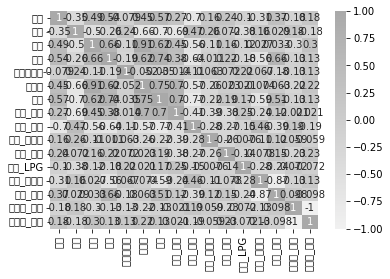

In [49]:
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_train.corr(), annot=True, cmap=cmap)
plt.show()

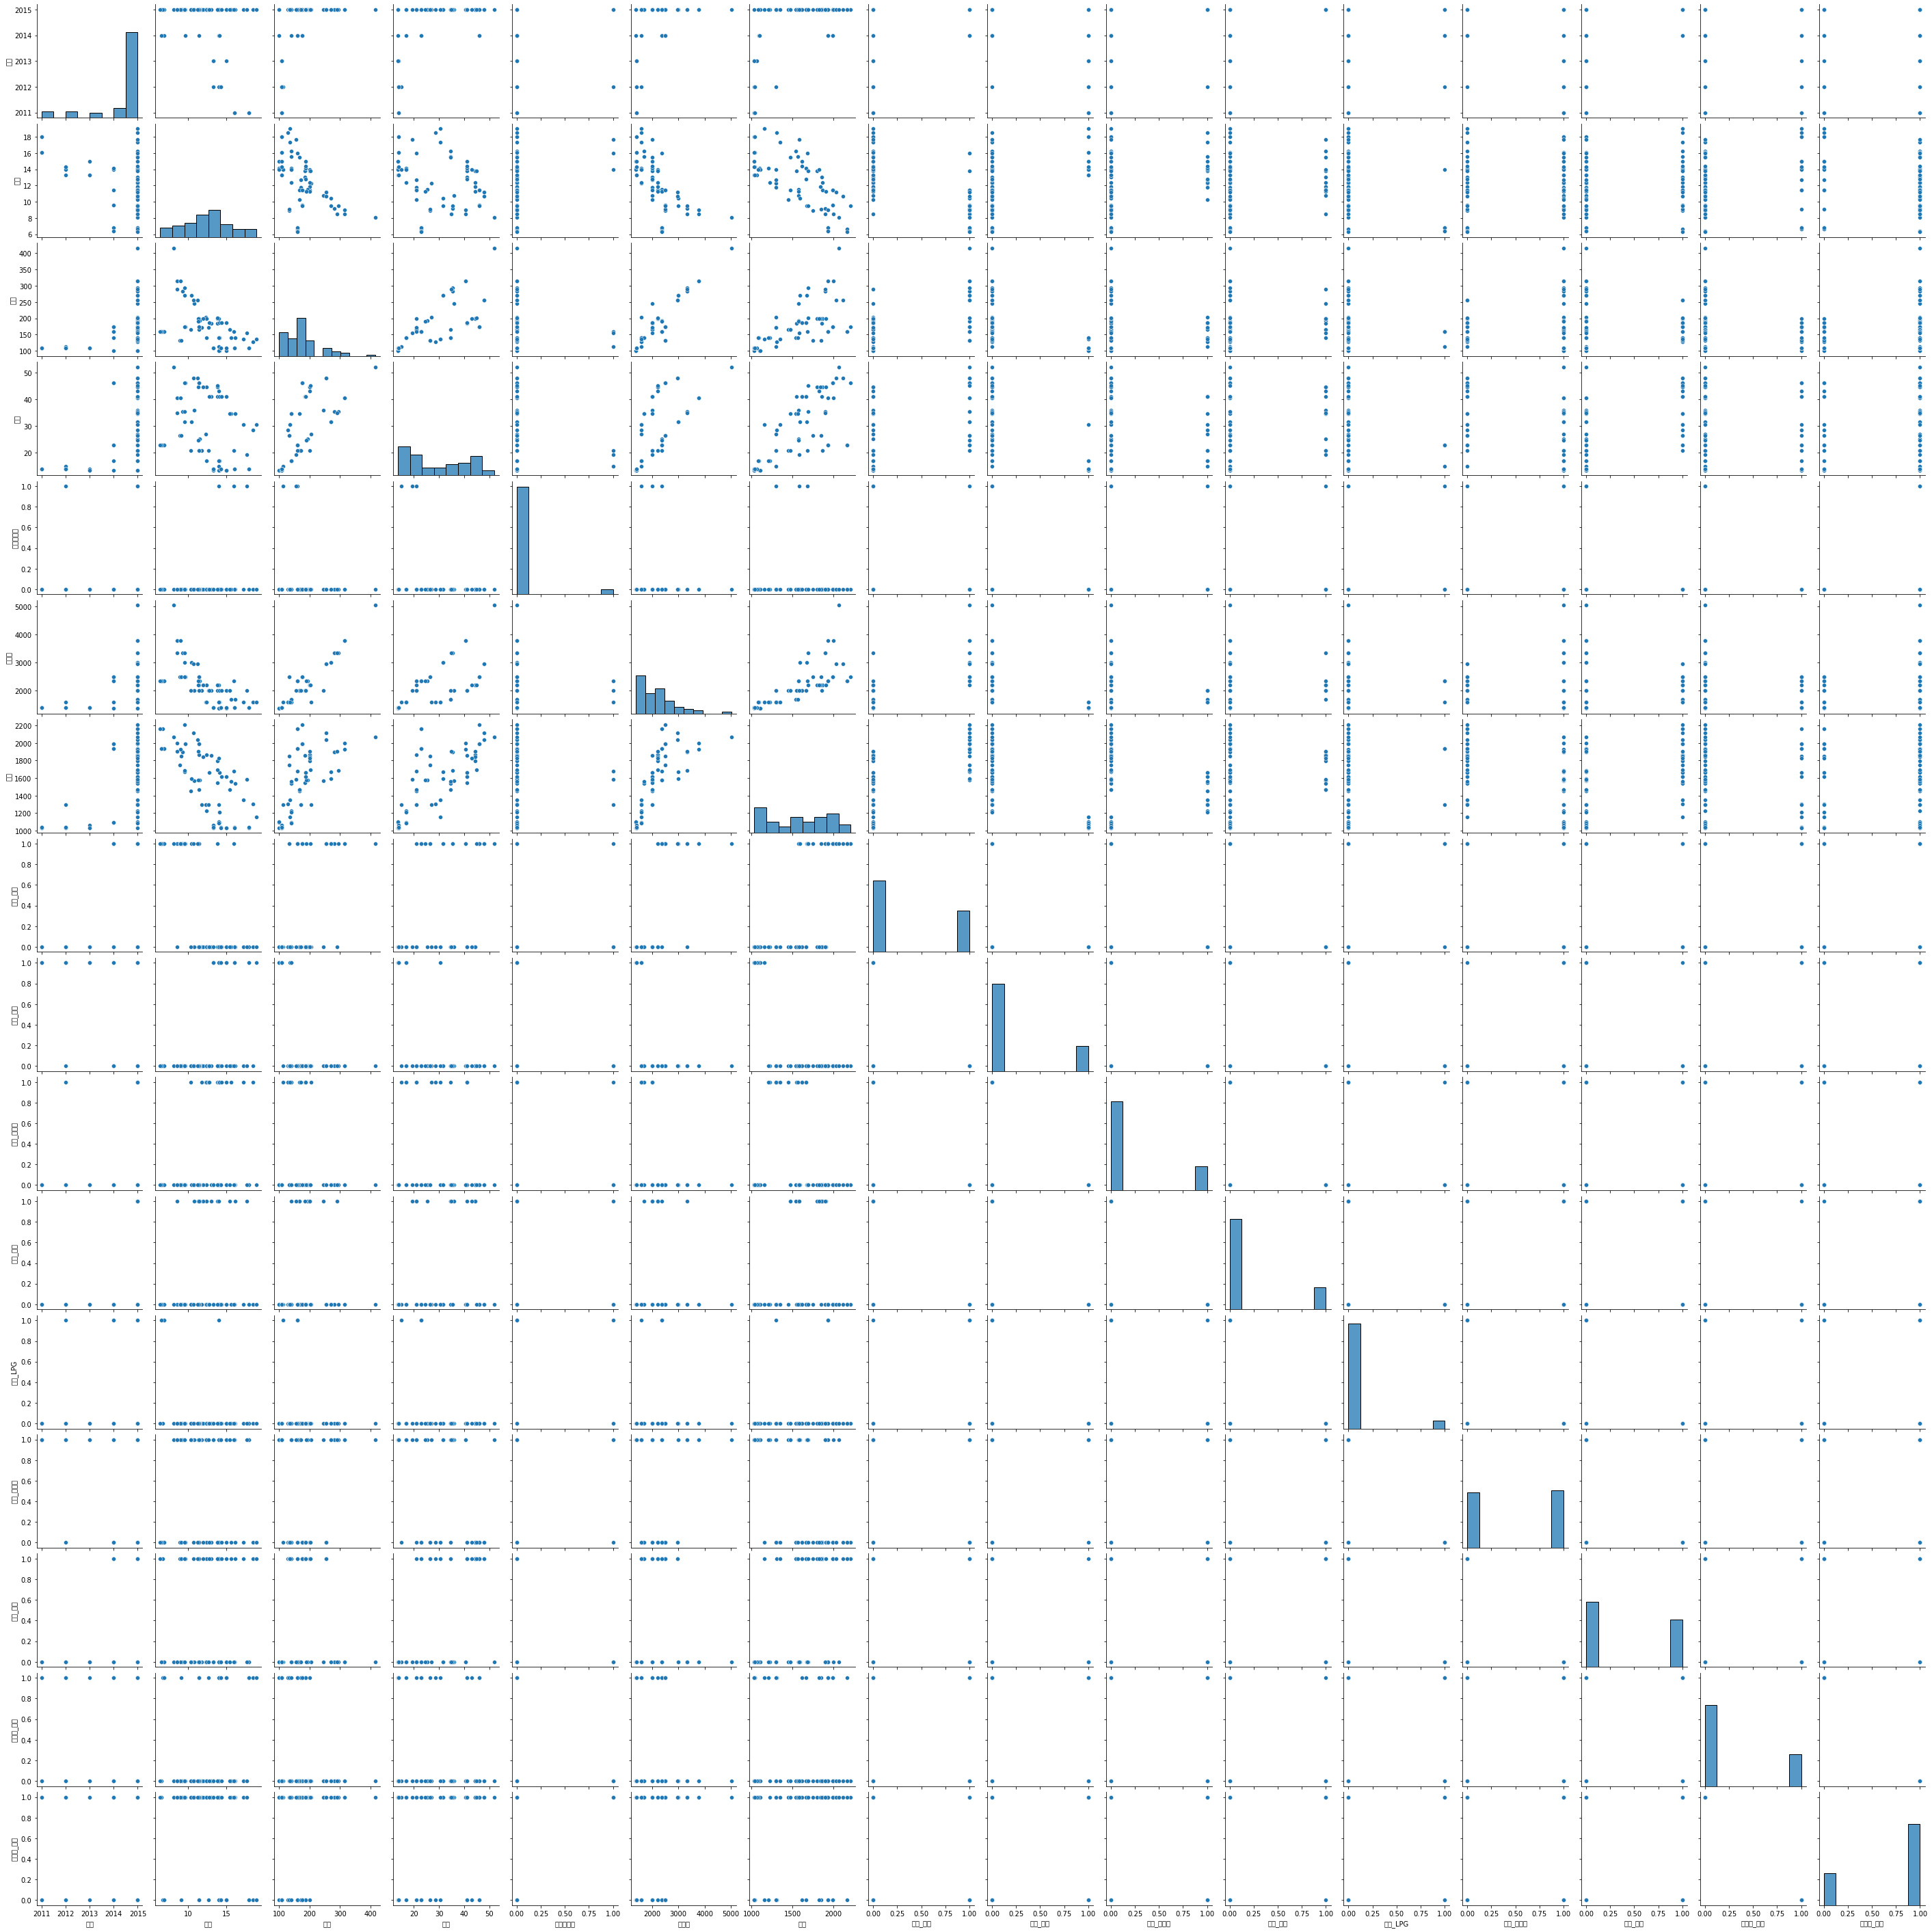

In [50]:
# x 변수 끼리는 상관도가 높으면 안좋다.

sns.pairplot(x_train)

In [51]:
x_train # 연식이 높아지면 연비가 떨어짐,
# 연식이 거의 대부분의 데이터에 영향을 미친다,
# 연식 데이터를 써야 할지 말지

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,0,0,1,0,0,1,0,0,1
1,2015,12.3,204,27.0,0,1591,1300,0,0,1,0,0,1,0,0,1
2,2015,15.0,100,13.6,0,1368,1035,0,1,0,0,0,1,0,1,0
3,2014,14.0,140,17.0,0,1591,1090,0,1,0,0,0,1,0,0,1
4,2015,9.6,175,46.0,0,2497,1990,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2015,8.5,290,34.8,0,3342,1901,0,0,0,1,0,1,0,0,1
67,2012,13.3,108,13.9,0,1396,1040,0,1,0,0,0,1,0,0,1
68,2015,12.8,186,41.0,0,1995,1665,0,0,1,0,0,0,1,0,1
69,2015,17.7,156,19.3,1,1999,1585,0,0,0,1,0,1,0,0,1


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_train.values, i) for i in range(x_train.shape[1])] # 열 갯수 만큼 돌려달라
vif["features"] = x_train.columns
vif

# vif  에서 10 이상 나오면 제거 하는것을 추천
## 중요한것은 제거 후에 다시 한번  vif를 찍어봐야 한다.
### vif 10 이상 인것이 안나올때 까지 돌려줘야 한다.


,VIF Factor,features
0,2.250638,년식
1,8.268898,연비
2,15.990800,마력
3,8.493106,토크
4,2.408516,하이브리드
5,18.810358,배기량
6,25.468813,중량
7,inf,종류_대형
8,inf,종류_소형
9,inf,종류_준중형


In [55]:
for i in x_train.shape[1] #16번 만큼 돌자

16

In [57]:
vif = pd.DataFrame()
x_data4= x_train.drop('중량',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,2.249105,년식
1,4.810727,연비
2,15.962721,마력
3,7.728296,토크
4,2.019361,하이브리드
5,17.707294,배기량
6,inf,종류_대형
7,inf,종류_소형
8,inf,종류_준중형
9,inf,종류_중형


In [59]:
vif = pd.DataFrame()
x_data5= x_data4.drop('배기량',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data5.values, i) for i in range(x_data5.shape[1])]
vif["features"] = x_data5.columns
vif

,VIF Factor,features
0,2.241546,년식
1,4.418499,연비
2,5.504890,마력
3,7.719493,토크
4,1.866423,하이브리드
5,inf,종류_대형
6,inf,종류_소형
7,inf,종류_준중형
8,inf,종류_중형
9,inf,연료_LPG


In [61]:
x_data5 = sm.add_constant(x_data4, has_constant='add')
model_vif = sm.OLS(y_train_df, x_data5)
fitted_model_vif=model_vif.fit()

In [62]:
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     가격   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     37.00
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.01e-22
Time:                        17:33:25   Log-Likelihood:                -540.79
No. Observations:                  71   AIC:                             1108.
Df Residuals:                      58   BIC:                             1137.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.573e+04   8.07e+04     -0.442      0.660   -1.97e+05    1.26e+05
년식            34.7936     83.495      0.417      0.678    -132.340     201.927
연비           125.6885     45.209      2.780      0.007      35.192     216.184
마력             9.8135      4.244      2.312      0.024       1.318      18.309
토크            -7.1680     14.884     -0.482      0.632     -36.961      22.625
하이브리드        354.4441    456.036      0.777      0.440    -558.411    1267.299
배기량            1.8037      0.398      4.535      0.000       1.008       2.600
종류_대형      -9456.8898   2.02e+04     -0.468      0.642   -4.99e+04     3.1e+04
종류_소형      -8488.4493   2.01e+04     -0.423      0.674   -4.87e+04    3.17e+04
종류_준중형     -8930.5643   2.02e+04     -0.442      0.660   -4.94e+04    3.15e+04
종류_중형      -8854.5317   2.02e+04     -0.438      0.663   -4.93e+04    3.16e+04
연료_LPG     -1.162e+04   2.69e+04     -0.433      0.667   -6.54e+04    4.21e+04
연료_가솔린     -1.214e+04   2.69e+04     -0.451      0.654    -6.6e+04    4.18e+04
연료_디젤      -1.197e+04    2.7e+04     -0.444      0.659   -6.59e+04     4.2e+04
변속기_수동     -1.802e+04   4.04e+04     -0.446      0.657   -9.88e+04    6.28e+04
변속기_자동     -1.771e+04   4.04e+04     -0.439      0.663   -9.85e+04    6.31e+04
==============================================================================
Omnibus:                       25.402   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.004
Skew:                           0.880   Prob(JB):                     3.17e-22
Kurtosis:                       8.511   Cond. No.                     3.75e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""